# UAS Project Streamlit: 
- **Nama:** [Jonathan Sebastian Marbun]
- **Dataset:** [Dataset lagu-lagu dan peringkat lagu di Spotify (https://www.kaggle.com/datasets/theoverman/the-spotify-hit-predictor-dataset, https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023, https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs]
- **URL Website:** [Di isi jika web streamlit di upload]



## Menentukan Pertanyaan Bisnis

- Bagaimana trend musik di dunia berdasarkan Spotify dari tahun 1960-2023?
- Musik seperti apa yang populer?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# folder read
import os
for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset/dataset-of-00s.csv
dataset/dataset-of-10s.csv
dataset/dataset-of-60s.csv
dataset/dataset-of-70s.csv
dataset/dataset-of-80s.csv
dataset/dataset-of-90s.csv
dataset/full_hits_dataset.csv
dataset/spotify-2023.csv
dataset/spotify_songs.csv
dataset/target.csv
dataset/top_songs_views_dataset.csv
dataset/track_artist_fhd.csv
dataset/track_artist_msd.csv
dataset/track_artist_tsd.csv


## Data Wrangling

### Gathering Data

In [2]:
hits_dataset_filenames=['dataset-of-10s','dataset-of-00s','dataset-of-90s','dataset-of-80s','dataset-of-70s','dataset-of-60s']
hits_dataset_dict={}
for name in hits_dataset_filenames:
    df=pd.read_csv(f'dataset/{name}.csv')
    df.drop(df.iloc[:, 14:18], inplace=True, axis=1)
    
    df.drop(['uri'], inplace=True, axis=1)
    df.drop(['loudness'], inplace=True, axis=1)
    
    print(df.shape)
    hits_dataset_dict[name]=df


(6398, 13)
(5872, 13)
(5520, 13)
(6908, 13)
(7766, 13)
(8642, 13)


### Assessing Data

In [3]:
full_hits_dataset = pd.concat(hits_dataset_dict.values(), ignore_index=True, axis=0)
track_artist_fhd=full_hits_dataset.pop('track') +full_hits_dataset.pop('artist')
track_artist_fhd.to_csv('dataset/track_artist_fhd.csv')
full_hits_dataset.info()

top_songs_dataset=pd.read_csv('dataset/spotify-2023.csv',encoding='latin-1')
top_songs_views_dataset=top_songs_dataset.pop('streams')
print(top_songs_dataset.columns)
top_songs_dataset.drop(top_songs_dataset.iloc[:, 2:13], inplace=True, axis=1)
# top_songs_dataset.drop(['track_id','duration_ms'], inplace=True, axis=1)

top_songs_dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      41106 non-null  float64
 1   energy            41106 non-null  float64
 2   key               41106 non-null  int64  
 3   mode              41106 non-null  int64  
 4   speechiness       41106 non-null  float64
 5   acousticness      41106 non-null  float64
 6   instrumentalness  41106 non-null  float64
 7   liveness          41106 non-null  float64
 8   valence           41106 non-null  float64
 9   tempo             41106 non-null  float64
 10  target            41106 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 3.4 MB
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playli

Index(['track_name', 'artist(s)_name', 'bpm', 'key', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'],
      dtype='object')

In [4]:
most_songs_dataset=pd.read_csv('dataset/spotify_songs.csv')

most_songs_dataset.drop(most_songs_dataset.iloc[:, 3:11], inplace=True, axis=1)
most_songs_dataset.drop(['track_id','duration_ms','loudness'], inplace=True, axis=1)



most_songs_dataset

,track_name,track_artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.748,0.916,6,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036
1,Memories - Dillon Francis Remix,Maroon 5,0.726,0.815,11,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972
2,All the Time - Don Diablo Remix,Zara Larsson,0.675,0.931,1,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.718,0.930,7,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.650,0.833,1,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976
...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,0.428,0.922,2,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,0.522,0.786,0,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041
32830,Sweet Surrender - Radio Edit,Starkillers,0.529,0.821,6,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989
32831,Only For You - Maor Levi Remix,Mat Zo,0.626,0.888,2,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008


In [5]:
for l in most_songs_dataset.columns:
    if l not in full_hits_dataset.columns:
        print(l)
        
most_songs_dataset.rename(columns={"track_name":"track","track_artist":"artist"}, inplace=True)
for l in most_songs_dataset.columns:
    if l not in full_hits_dataset.columns:
        print(l)
        
track_artist_msd=most_songs_dataset.pop('track') +" "+ most_songs_dataset.pop('artist') 
track_artist_msd.to_csv('dataset/track_artist_msd.csv')

track_artist_msd
 

track_name
track_artist
track
artist


0        I Don't Care (with Justin Bieber) - Loud Luxur...
1                 Memories - Dillon Francis Remix Maroon 5
2             All the Time - Don Diablo Remix Zara Larsson
3        Call You Mine - Keanu Silva Remix The Chainsmo...
4        Someone You Loved - Future Humans Remix Lewis ...
                               ...                        
32828    City Of Lights - Official Radio Edit Lush & Simon
32829    Closer - Sultan & Ned Shepard Remix Tegan and ...
32830             Sweet Surrender - Radio Edit Starkillers
32831                Only For You - Maor Levi Remix Mat Zo
32832                  Typhoon - Original Mix Julian Calor
Length: 32833, dtype: object

In [6]:
features=['tempo','key','mode','danceability','valence','energy','acousticness','instrumentalness','liveness','speechiness']

In [7]:
#no loudness in this
for l in top_songs_dataset.columns:
    if l not in full_hits_dataset.columns:
        print(l)
        
# top_songs_dataset.rename(columns={"track_name":"track","track_artist":"artist"}, inplace=True)
top_songs_dataset
top_songs_dataset=top_songs_dataset.set_axis(['track','artist','tempo','key','mode','danceability','valence','energy','acousticness','instrumentalness','liveness','speechiness'], axis="columns")
for l in top_songs_dataset.columns:
    if l not in full_hits_dataset.columns:
        print(l)
track_artist_tsd=top_songs_dataset.pop('track')+" " +top_songs_dataset.pop('artist')
track_artist_tsd.to_csv('dataset/track_artist_tsd.csv')
top_songs_views_dataset=pd.concat([track_artist_tsd,top_songs_views_dataset], axis=1, join="inner",ignore_index=True)
top_songs_views_dataset=top_songs_views_dataset.set_axis(['track - artist', 'views'],axis='columns')
top_songs_views_dataset.to_csv('dataset/top_songs_views_dataset.csv')

top_songs_views_dataset     
# top_songs_views_dataset.columns

track_name
artist(s)_name
bpm
danceability_%
valence_%
energy_%
acousticness_%
instrumentalness_%
liveness_%
speechiness_%
track
artist


,track - artist,views
0,"Seven (feat. Latto) (Explicit Ver.) Latto, Jun...",141381703
1,LALA Myke Towers,133716286
2,vampire Olivia Rodrigo,140003974
3,Cruel Summer Taylor Swift,800840817
4,WHERE SHE GOES Bad Bunny,303236322
...,...,...
948,My Mind & Me Selena Gomez,91473363
949,Bigger Than The Whole Sky Taylor Swift,121871870
950,"A Veces (feat. Feid) Feid, Paulo Londra",73513683
951,"En La De Ella Feid, Sech, Jhayco",133895612


### Cleaning Data

In [8]:
chords=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

In [9]:
top_songs_dataset.loc[top_songs_dataset['mode'] == 'Major', 'mode'] = 1
top_songs_dataset.loc[top_songs_dataset['mode'] == 'Minor', 'mode'] = 0
top_songs_dataset['key'] = top_songs_dataset['key'].fillna(-1)
for chord in chords:
    top_songs_dataset.loc[top_songs_dataset['key'] == chord, 'key'] = chords.index(chord)
labs = list(top_songs_dataset.columns)

for lab in labs:
    print(top_songs_dataset[lab].unique())

[125  92 138 170 144 141 148 100 130  83 150 118 174  89 120  78 140 123
 135 133  99 107 122 204 110 126 168  98  97 180  96  95  90 128  79 134
 186  67 106 171 137 101 173 198  82  81  94 124 132 131 102 142 116 129
 172 136  88 143 112  93 206  84 158 117 114 108 121 127 139 162 146 115
 119  80 160 192 163 154 104 164 145  85 166 109 157  74 105 155 149 169
  91 202 153 178 176 111 182 175  87  76 113  77 177 147  75 103 151 152
  65 179  86  73 181 161  72 184  71 189 200 196 188 156 183 165]
[11 1 5 9 2 6 -1 8 7 4 10 3]
[1 0]
[80 71 51 55 65 92 67 85 81 57 78 52 64 44 86 63 69 48 79 74 56 72 61 75
 60 76 77 59 68 53 45 50 84 70 88 90 43 62 49 58 34 91 82 83 54 87 35 42
 93 47 73 66 33 37 89 95 94 32 40 36 25 41 46 39 24 23 27 28 31 29 96 38]
[89 61 32 58 23 66 83 26 22 56 52 65 43 76 14 67 36 87 82 44 81 96 74 78
 35 63 17 51 39 57 48 84 91 38 75 49 50 55 13 88 85 42 53 59 86 72 40 28
 10 71 41 27 24 20 70 45 19 34 69 37 92 47 18 79 54 30 31 68 12 33 90 73
 60 95 93 46  5 64 25 

In [10]:
feat_dict={}
for lab in list(full_hits_dataset.columns):
    if lab in ['target','tempo','key','mode']: 
        feat_dict[lab]=1
        continue
    feat_dict[lab]=100
full_hits_dataset.mul(feat_dict)
# print(len(feat_dict))
feat_dict.pop('target')
print(feat_dict)
top_songs_dataset.mul(feat_dict)
most_songs_dataset.mul(feat_dict)
top_songs_dataset=top_songs_dataset[most_songs_dataset.columns]
full_hits_dataset

{'danceability': 100, 'energy': 100, 'key': 1, 'mode': 1, 'speechiness': 100, 'acousticness': 100, 'instrumentalness': 100, 'liveness': 100, 'valence': 100, 'tempo': 1}


,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,target
0,0.741,0.6260,1,0,0.0886,0.02000,0.000000,0.0828,0.706,108.029,1
1,0.447,0.2470,5,0,0.0346,0.87100,0.814000,0.0946,0.250,155.489,0
2,0.550,0.4150,9,0,0.0520,0.16100,0.000000,0.1080,0.274,172.065,1
3,0.502,0.6480,0,0,0.0527,0.00513,0.000000,0.2040,0.291,91.837,0
4,0.807,0.8870,1,1,0.2750,0.00381,0.000000,0.3910,0.780,160.517,1
...,...,...,...,...,...,...,...,...,...,...,...
41101,0.420,0.8730,3,1,0.1000,0.80800,0.879000,0.3630,0.183,119.821,0
41102,0.716,0.7420,10,0,0.2420,0.66300,0.000000,0.1070,0.834,135.104,0
41103,0.361,0.0944,10,1,0.0327,0.94000,0.000178,0.1150,0.139,92.472,0
41104,0.452,0.7590,4,0,0.1750,0.65800,0.000000,0.7380,0.853,137.976,0


## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
from sklearn.model_selection import train_test_split

y=full_hits_dataset.pop('target')
# full_hits_dataset.drop(['mode','key'], inplace=True, axis=1)
y.to_csv('dataset/target.csv')
y.to_csv('dataset/target.csv')
full_hits_dataset.to_csv('dataset/full_hits_dataset.csv')

X_train, X_test, y_train, y_test = train_test_split(full_hits_dataset, y, test_size=0.2, random_state=42)


## Visualization & Explanatory Analysis

### Pertanyaan 1:

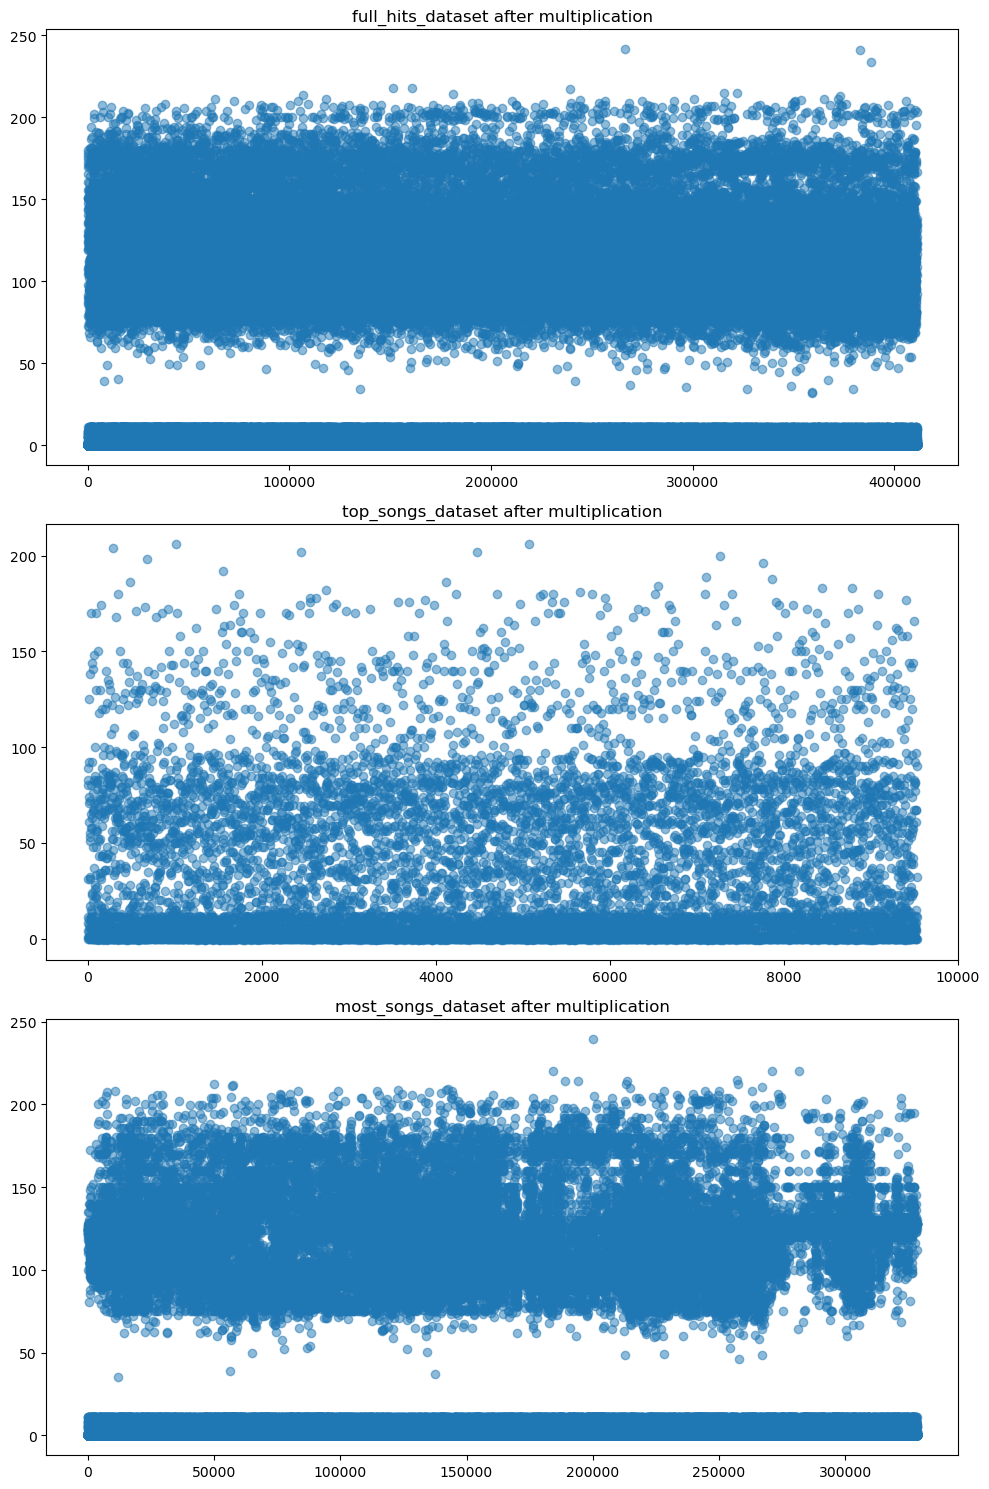

In [17]:
# Convert the dataframes to 1D arrays for scatter plot
full_hits_flat = full_hits_dataset.to_numpy().flatten()
top_songs_flat = top_songs_dataset.to_numpy().flatten()
most_songs_flat = most_songs_dataset.to_numpy().flatten()

# Create scatter plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Scatter plot for full_hits_dataset
axes[0].scatter(range(len(full_hits_flat)), full_hits_flat, alpha=0.5)
axes[0].set_title('full_hits_dataset after multiplication')

# Scatter plot for top_songs_dataset
axes[1].scatter(range(len(top_songs_flat)), top_songs_flat, alpha=0.5)
axes[1].set_title('top_songs_dataset after multiplication')

# Scatter plot for most_songs_dataset
axes[2].scatter(range(len(most_songs_flat)), most_songs_flat, alpha=0.5)
axes[2].set_title('most_songs_dataset after multiplication')

plt.tight_layout()
plt.show()


### Pertanyaan 2:

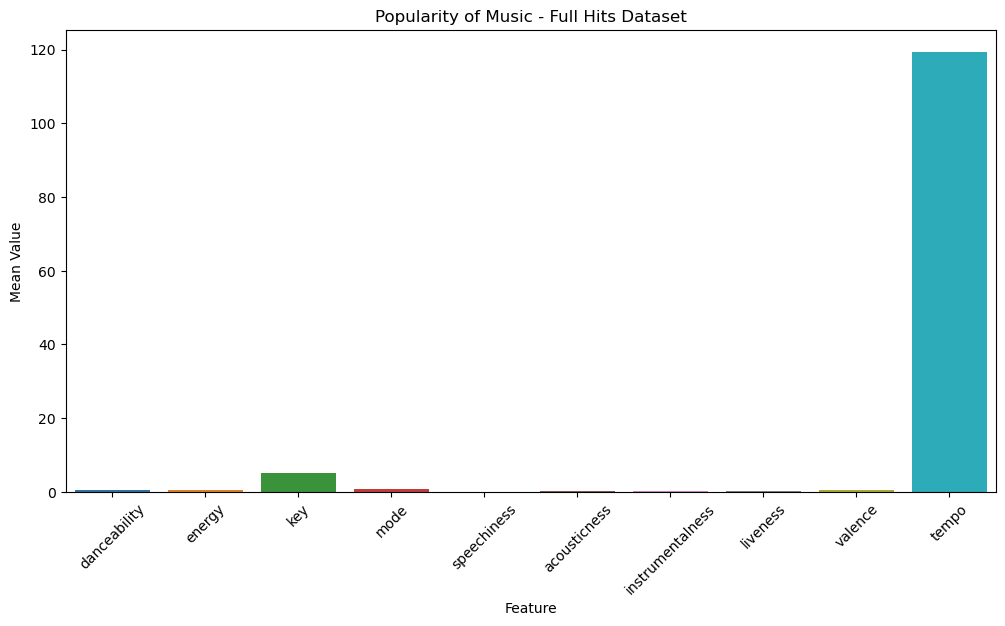

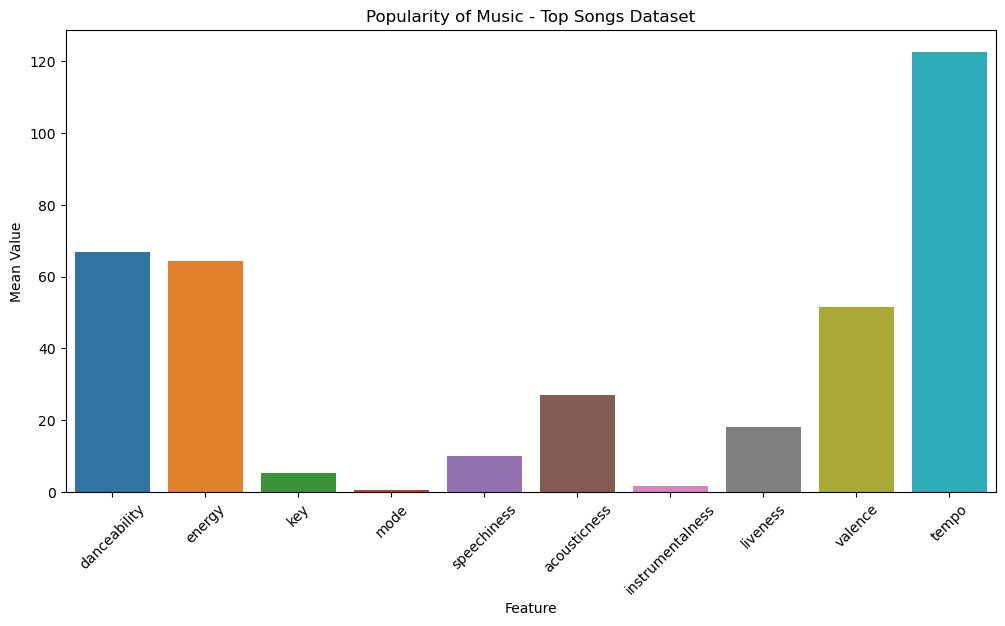

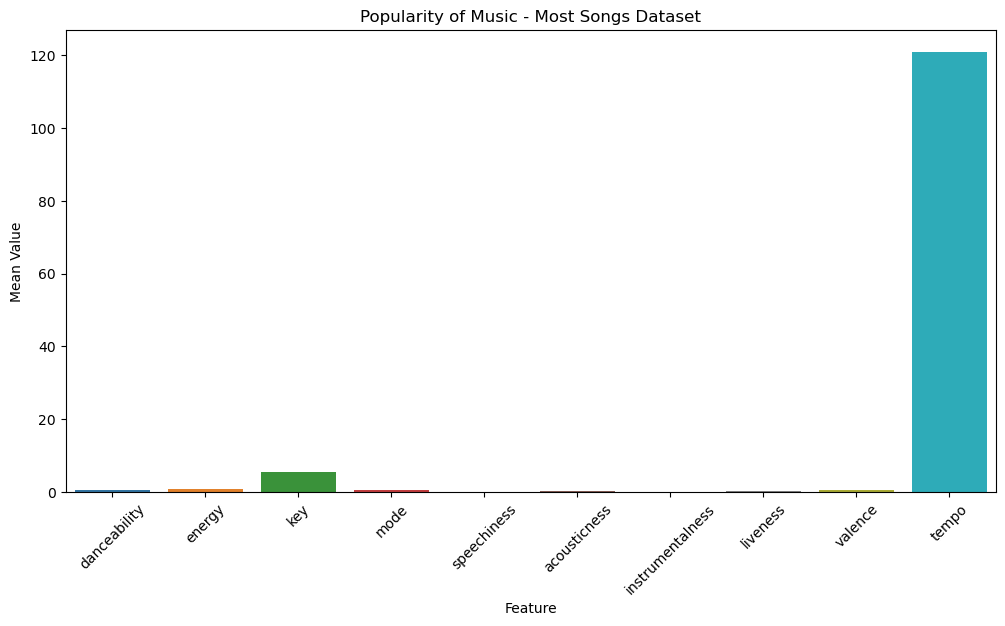

In [18]:
def plot_feature_by_category(dataset, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=dataset.mean().reset_index(), x='index', y=0)
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.show()

# Plot for full_hits_dataset
plot_feature_by_category(full_hits_dataset, 'Popularity of Music - Full Hits Dataset')

# Plot for top_songs_dataset
plot_feature_by_category(top_songs_dataset, 'Popularity of Music - Top Songs Dataset')

# Plot for most_songs_dataset
plot_feature_by_category(most_songs_dataset, 'Popularity of Music - Most Songs Dataset')

## Membuat Model 

In [19]:
# GaussianProcessClassifier() too much memory can't run
# KNeighborsClassifier(),RadiusNeighborsClassifier() no time to try

models=[svm.SVC(),svm.NuSVC()]
for model in models:
    dec = model
    dec=dec.fit(X_train,y_train)
    y_pred=dec.predict(X_test)


    print(classification_report(y_test, y_pred))
    conf_mat=confusion_matrix(y_test, y_pred)
    print(conf_mat)
    print(conf_mat.ravel())

              precision    recall  f1-score   support

           0       0.65      0.35      0.46      4123
           1       0.55      0.81      0.66      4099

    accuracy                           0.58      8222
   macro avg       0.60      0.58      0.56      8222
weighted avg       0.60      0.58      0.56      8222

[[1458 2665]
 [ 796 3303]]
[1458 2665  796 3303]
              precision    recall  f1-score   support

           0       0.45      0.39      0.42      4123
           1       0.46      0.53      0.49      4099

    accuracy                           0.46      8222
   macro avg       0.46      0.46      0.46      8222
weighted avg       0.46      0.46      0.46      8222

[[1609 2514]
 [1934 2165]]
[1609 2514 1934 2165]


In [20]:
# HistGradientBoostingClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),AdaBoostClassifier() best
# svm.LinearSVC() very good not consistent
#tree.DecisionTreeClassifier(),SGDClassifier() +


models=[HistGradientBoostingClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),svm.LinearSVC(),SGDClassifier(),tree.DecisionTreeClassifier()]
for model in models:
    dec = model
    dec=dec.fit(X_train,y_train)
    y_pred=dec.predict(X_test)


    print(classification_report(y_test, y_pred))
    conf_mat=confusion_matrix(y_test, y_pred)
    print(conf_mat)
    print(conf_mat.ravel())

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      4123
           1       0.74      0.85      0.79      4099

    accuracy                           0.78      8222
   macro avg       0.78      0.78      0.78      8222
weighted avg       0.78      0.78      0.78      8222

[[2936 1187]
 [ 635 3464]]
[2936 1187  635 3464]
              precision    recall  f1-score   support

           0       0.81      0.72      0.77      4123
           1       0.75      0.83      0.79      4099

    accuracy                           0.78      8222
   macro avg       0.78      0.78      0.78      8222
weighted avg       0.78      0.78      0.78      8222

[[2987 1136]
 [ 692 3407]]
[2987 1136  692 3407]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      4123
           1       0.74      0.84      0.79      4099

    accuracy                           0.78      8222
   macro avg       0.78      0

D:\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.32      0.48      4123
           1       0.59      0.98      0.74      4099

    accuracy                           0.65      8222
   macro avg       0.76      0.65      0.61      8222
weighted avg       0.76      0.65      0.61      8222

[[1339 2784]
 [  93 4006]]
[1339 2784   93 4006]
              precision    recall  f1-score   support

           0       0.58      0.91      0.71      4123
           1       0.79      0.34      0.47      4099

    accuracy                           0.63      8222
   macro avg       0.69      0.62      0.59      8222
weighted avg       0.69      0.63      0.59      8222

[[3758  365]
 [2714 1385]]
[3758  365 2714 1385]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      4123
           1       0.69      0.70      0.70      4099

    accuracy                           0.70      8222
   macro avg       0.70      0

### Training Model

In [21]:
pred=[]
models=[HistGradientBoostingClassifier(),RandomForestClassifier()]
# models=[HistGradientBoostingClassifier()]
for model in models:
    dec = model
    dec=dec.fit(X_train,y_train)
    y_pred=dec.predict(most_songs_dataset)
    pred.append(y_pred)

# full_msd_hgbc=track_artist_msd+most_songs_dataset+y_pred[0]
# full_msd_rfc=track_artist_msd+most_songs_dataset+y_pred[1]

In [24]:
pred[0]=pd.DataFrame(pred[0],columns=['hit'])
pred[1]=pd.DataFrame(pred[1],columns=['hit'])

preds=[]
models=[HistGradientBoostingClassifier(),RandomForestClassifier()]
# models=[HistGradientBoostingClassifier()]
for model in models:
    dec = model
    dec=dec.fit(X_train,y_train)
    y_pred=dec.predict(top_songs_dataset)
    preds.append(y_pred)

In [25]:
preds[0]=pd.DataFrame(pred[0],columns=['hit'])
preds[1]=pd.DataFrame(pred[1],columns=['hit'])

### Evaluasi Model

In [26]:
# result = pd.concat([df1, df4], axis=1, join="inner")

full_msd_hgbc=pd.concat([track_artist_msd,pred[0]], axis=1, join="inner",ignore_index=True)
full_msd_rfc=pd.concat([track_artist_msd,pred[1]], axis=1, join="inner",ignore_index=True)
# full_msd_hgbc.rename(columns={"0": "track - artist", "1": "Hit"},inplace=True)
# full_msd_rfc.rename(columns={"0": "track - artist", "1": "Hit"},inplace=True)
print(full_msd_hgbc.shape)
full_msd_hgbc=full_msd_hgbc.set_axis(['track - artist', 'hit'], axis='columns')
full_msd_rfc=full_msd_rfc.set_axis(['track - artist', 'hit'], axis='columns')
# full_msd_hgbc.compare(full_msd_rfc)
print(full_msd_hgbc['track - artist'].isin(top_songs_views_dataset['track - artist'].values).unique(),
full_msd_rfc['track - artist'].isin(top_songs_views_dataset['track - artist'].values).unique())

(32833, 2)
[False  True] [False  True]


In [27]:
# result = pd.concat([df1, df4], axis=1, join="inner")

full_tsd_hgbc=pd.concat([track_artist_tsd,preds[0]], axis=1, join="inner",ignore_index=True)
full_tsd_rfc=pd.concat([track_artist_tsd,preds[1]], axis=1, join="inner",ignore_index=True)
# full_msd_hgbc.rename(columns={"0": "track - artist", "1": "Hit"},inplace=True)
# full_msd_rfc.rename(columns={"0": "track - artist", "1": "Hit"},inplace=True)
print(full_tsd_hgbc.shape)
full_tsd_hgbc=full_tsd_hgbc.set_axis(['track - artist', 'hit'], axis='columns')
full_tsd_rfc=full_tsd_rfc.set_axis(['track - artist', 'hit'], axis='columns')
# full_msd_hgbc.compare(full_msd_rfc)
print(full_tsd_hgbc['track - artist'].isin(top_songs_views_dataset['track - artist'].values).unique(),
full_tsd_rfc['track - artist'].isin(top_songs_views_dataset['track - artist'].values).unique())

(953, 2)
[ True] [ True]


### Menyimpan Model

In [29]:
full_msd_rfc.set_axis(['track - artist', 'hit'],axis='columns')
full_msd_hgbc.set_axis(['track - artist', 'hit'],axis='columns')
print(top_songs_views_dataset.shape,full_msd_hgbc.shape,full_msd_hgbc['hit'].value_counts(),full_msd_rfc.shape,full_msd_rfc['hit'].value_counts())
merged_msd_hgbc = full_msd_hgbc.merge(top_songs_views_dataset,how="inner")
merged_msd_rfc=full_msd_rfc.merge(top_songs_views_dataset,how="inner")
print(merged_msd_hgbc['hit'].value_counts(),merged_msd_hgbc.shape,
merged_msd_rfc['hit'].value_counts(),merged_msd_rfc.shape)

full_tsd_rfc.set_axis(['track - artist', 'hit'],axis='columns')
full_tsd_hgbc.set_axis(['track - artist', 'hit'],axis='columns')
print(top_songs_views_dataset.shape,full_tsd_hgbc.shape,full_tsd_hgbc['hit'].value_counts(),full_tsd_rfc.shape,full_tsd_rfc['hit'].value_counts())
merged_tsd_hgbc = full_tsd_hgbc.merge(top_songs_views_dataset,how="inner")
merged_tsd_rfc=full_tsd_rfc.merge(top_songs_views_dataset,how="inner")
print(merged_tsd_hgbc['hit'].value_counts(),merged_tsd_hgbc.shape,
merged_tsd_rfc['hit'].value_counts(),merged_tsd_rfc.shape)

(953, 2) (32833, 2) hit
1    24513
0     8320
Name: count, dtype: int64 (32833, 2) hit
1    24574
0     8259
Name: count, dtype: int64
hit
1    196
0     51
Name: count, dtype: int64 (247, 3) hit
1    226
0     21
Name: count, dtype: int64 (247, 3)
(953, 2) (953, 2) hit
1    858
0     95
Name: count, dtype: int64 (953, 2) hit
1    857
0     96
Name: count, dtype: int64
hit
1    865
0     96
Name: count, dtype: int64 (961, 3) hit
1    864
0     97
Name: count, dtype: int64 (961, 3)


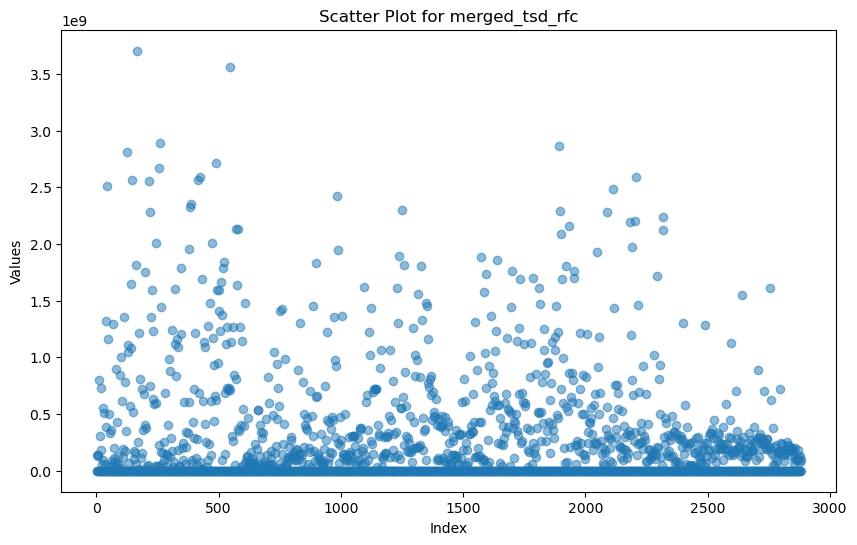

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_tsd_rfc is a DataFrame
# If it's a numpy array, you can convert it to a DataFrame using pd.DataFrame()

# Convert values to numeric
numeric_values = pd.to_numeric(merged_tsd_rfc.to_numpy().flatten(), errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(numeric_values)), numeric_values, alpha=0.5)
plt.title('Scatter Plot for merged_tsd_rfc')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

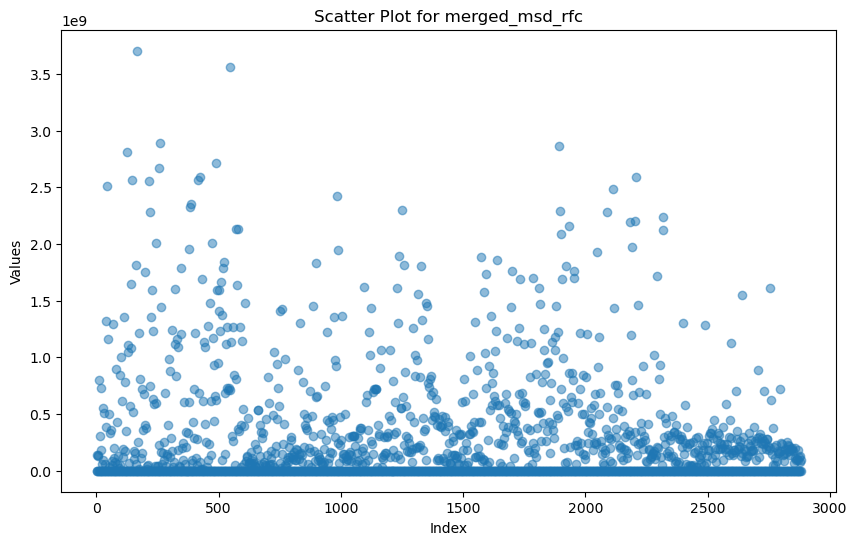

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_tsd_rfc is a DataFrame
# If it's a numpy array, you can convert it to a DataFrame using pd.DataFrame()

# Convert values to numeric
numeric_values = pd.to_numeric(merged_tsd_rfc.to_numpy().flatten(), errors='coerce')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(numeric_values)), numeric_values, alpha=0.5)
plt.title('Scatter Plot for merged_msd_rfc')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

## Conclusion

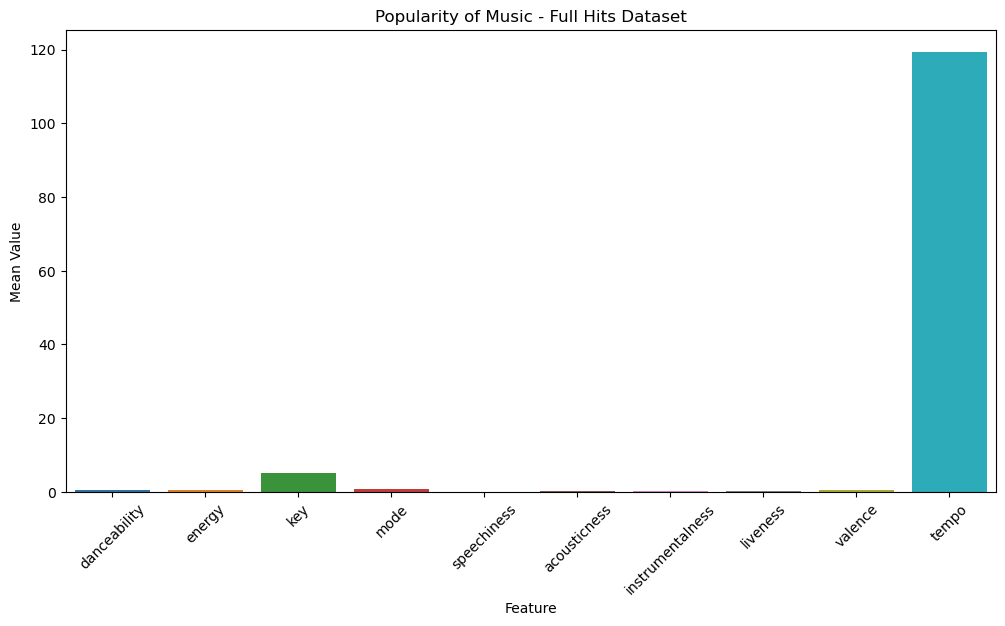

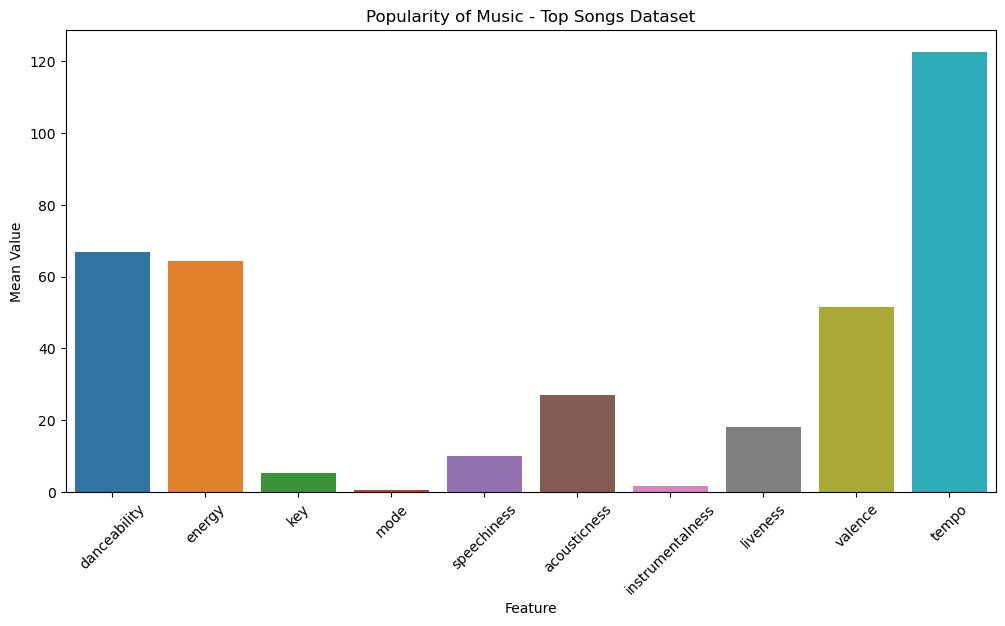

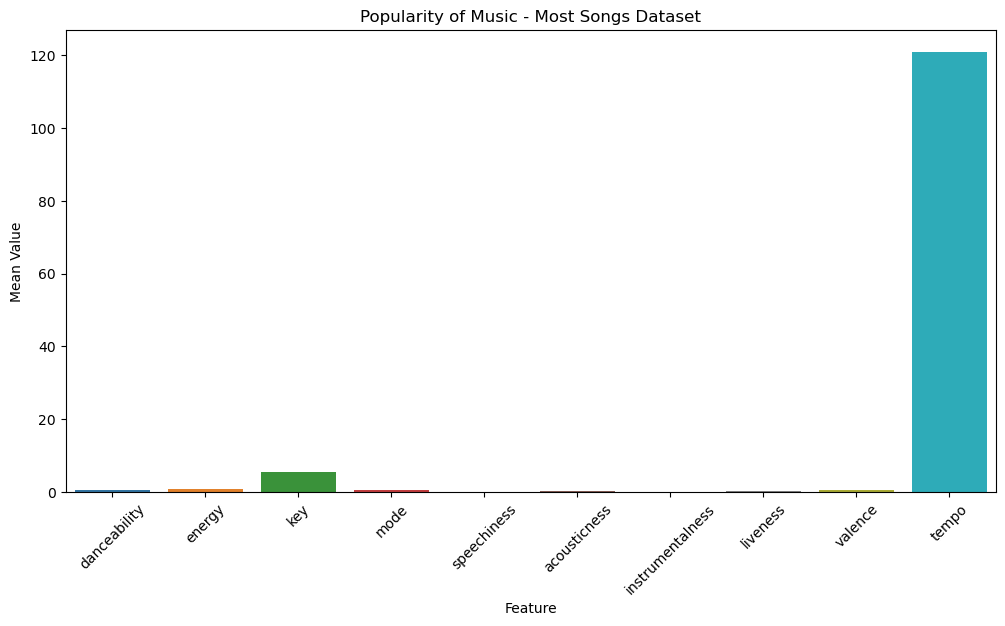

In [55]:
def plot_feature_by_category(dataset, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=dataset.mean().reset_index(), x='index', y=0)
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.show()

# Plot for full_hits_dataset
plot_feature_by_category(full_hits_dataset, 'Popularity of Music - Full Hits Dataset')

# Plot for top_songs_dataset
plot_feature_by_category(top_songs_dataset, 'Popularity of Music - Top Songs Dataset')

# Plot for most_songs_dataset
plot_feature_by_category(most_songs_dataset, 'Popularity of Music - Most Songs Dataset')

In [59]:
print("Most Song Dataset")
merged_msd_rfc

Most Song Dataset


,track - artist,hit,views
0,The Nights Avicii,1,1456081449
1,The Nights Avicii,1,1456081449
2,The Nights Avicii,1,1456081449
3,Counting Stars OneRepublic,1,2011464183
4,Counting Stars OneRepublic,1,2011464183
...,...,...,...
242,Falling Harry Styles,1,1023187129
243,Dark Red Steve Lacy,1,920045682
244,All I Want for Christmas Is You Mariah Carey,1,1449779435
245,Run Rudolph Run - Single Version Chuck Berry,0,245350949


In [60]:
print("Top Song Dataset")
merged_tsd_rfc

Top Song Dataset


,track - artist,hit,views
0,"Seven (feat. Latto) (Explicit Ver.) Latto, Jun...",1,141381703
1,LALA Myke Towers,1,133716286
2,vampire Olivia Rodrigo,1,140003974
3,Cruel Summer Taylor Swift,0,800840817
4,WHERE SHE GOES Bad Bunny,1,303236322
...,...,...,...
956,My Mind & Me Selena Gomez,1,91473363
957,Bigger Than The Whole Sky Taylor Swift,1,121871870
958,"A Veces (feat. Feid) Feid, Paulo Londra",1,73513683
959,"En La De Ella Feid, Sech, Jhayco",1,133895612


- Conclution pertanyaan 1
- Conclution pertanyaan 2